In [ ]:
class SearchProblem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial, goal=None, **kwds):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        self.initial = initial
        self.goal = goal


    def actions(self, node):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        raise NotImplementedError

    def result(self, node, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        raise NotImplementedError

    def is_goal(self, node):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        return self.goal == node

    def action_cost(self, s, a, s1):
        """Return the cost of a solution path that arrives at state s1 from
        state s via action a. If the problem
        is such that the path doesn't matter, this function will only look at
        state s1.  If the path does matter, it will consider state s1
        and action a. The default method costs 1 for every step in the path."""
        return 1

    def h(self, node):
     raise NotImplementedError

    def g(self, node):
     return node.path_cost()

    def f(self, node):
     return self.g(node) + self.h(node)

In [ ]:
class Node:
    def __init__(self, state='', parent=None, action=None, cost=1):
        self.state = state
        self.parent = parent
        self.action = action

    def states_path(self):
        if self.parent == None:
            return [self]
        return self.parent.states_path() + [self]

    def actions_path(self):
        if self.parent == None:
            return []
        return self.parent.actions_path() + [self.action]

    def __eq__(self, node):
        if node:
            return self.state == node.state
        return False

    def path_cost(self):
        total_cost = 0
        if self.parent is None:
            return total_cost
        total_cost += self.cost + self.parent.path_cost()
        return total_cost

    def __repr__(self):
        return str(self.state)

In [ ]:
import heapq
class PriorityQueue:
    """
      Implements a priority queue data structure. Each inserted item
      has a priority associated with it and the client is usually interested
      in quick retrieval of the lowest-priority item in the queue. This
      data structure allows O(1) access to the lowest-priority item.
    """
    def  __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    break
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                break
        else:
            self.push(item, priority)

**UCS**

In [ ]:
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def UCS(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node, len(closed)
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.g(child))

**Voraz**

In [ ]:
# Completar
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def Voraz(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node, len(closed)
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.h(child))

**( A* )**

In [ ]:
# Completar
def expand(problem, node):
    childs = []
    for action in problem.actions(node):
        childs.append(problem.result(node, action))
    return childs

def AA(problem, fringe=PriorityQueue()):
    closed = []
    fringe.push(problem.initial, 0)

    while(True):
        node = fringe.pop()
        if problem.is_goal(node):
            return node, len(closed)
        if node not in closed:
            closed.append(node)
            for child in expand(problem, node):
                fringe.push(child, problem.f(child))

In [ ]:
# Solución propuesta

class Juego_de_numeros(SearchProblem):
  'Simple Graph as a search problem'

  def desplazarse_UD(self,state_copy,x):

      for i in range(36):
          if state_copy[i]==2:
            if i+x<=35 and  i+x>=0:
              if state_copy[i+x]!=1:
                  state_copy[i]=0
                  state_copy[i+x]=2
            return state_copy

  def desplazarse_L(self,state_copy,x):

      for i in range(36):
          if state_copy[i]==2:
            if (i+x<=35 and  i+x>=0) and (i%6!=0):
              if state_copy[i+x]!=1:
                  state_copy[i]=0
                  state_copy[i+x]=2
            return state_copy

  def desplazarse_R(self,state_copy,x):

      for i in range(36):
          if state_copy[i]==2:
            if (i+x<=35 and  i+x>=0) and ((i+1)%6!=0):
              if state_copy[i+x]!=1:
                  state_copy[i]=0
                  state_copy[i+x]=2
            return state_copy

  def actions(self, node):
    return ['move-L','move-U','move-R','move-D']

  def result(self, node, action):

    L=node.state.copy()
    result = []

    if action == 'move-L':
      result =self.desplazarse_L(L,-1)
    elif action == 'move-R':
      result =self.desplazarse_R(L,1)
    elif action == 'move-U':
      result =self.desplazarse_UD(L,-6)
    elif action == 'move-D':
      result =self.desplazarse_UD(L,6)

    new_node = Node(result, node, action)
    new_node.cost = 1
    return new_node

  def h(self, node):

    import math

    L = node.state.copy()

    for i in range(len(L)):
      if L[i]==2:
        y=int(i/6)
        x=int(((i/6)-y)*6)
        heuristica = math.sqrt(pow(y,2)+pow(x,2))
    return heuristica

In [ ]:
def objecto_a_lista(list_objects):
  for j in list_objects:
    Solutions_list=[]
    Solutions=[]
    Solutions_list = str(j)
    for i in range(len(Solutions_list)):
      if Solutions_list[i]=='0' or Solutions_list[i]=='1' or Solutions_list[i]=='2':
        Solutions.append(int(Solutions_list[i]))
    pintar(Solutions)

In [ ]:
import seaborn as sns
import math

def pintar(lista):

  Lista_pintar=[]
  Lista_temp=[]
  raiz = int(math.sqrt(len(lista)))
  for j in range(len(lista)):
    Lista_temp.append(lista[j])
    if(j+1)%raiz==0:
      Lista_pintar.append(Lista_temp)
      Lista_temp=[]

  sns.heatmap(Lista_pintar)
  sns.displot()

In [ ]:
inicio = Node(state=[0,0,0,1,0,1,
                     0,1,0,0,0,0,
                     0,0,0,0,1,0,
                     0,0,1,1,0,0,
                     1,0,1,0,1,0,
                     0,0,0,0,0,2])

fin = Node(state=[2,0,0,1,0,1,
                  0,1,0,0,0,0,
                  0,0,0,0,1,0,
                  0,0,1,1,0,0,
                  1,0,1,0,1,0,
                  0,0,0,0,0,0])

problema = Juego_de_numeros(initial=inicio,goal=fin)

Algoritmo de costo uniforme:
Action sequence: ['move-L', 'move-L', 'move-L', 'move-L', 'move-U', 'move-U', 'move-L', 'move-U', 'move-U', 'move-U']
Cost: 10

Solucion paso a paso: 


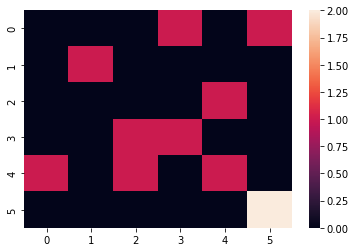

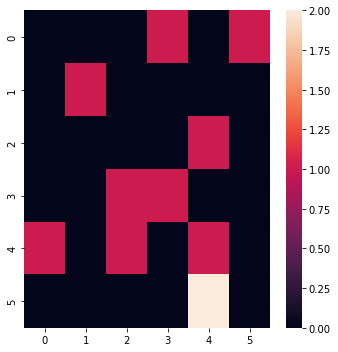

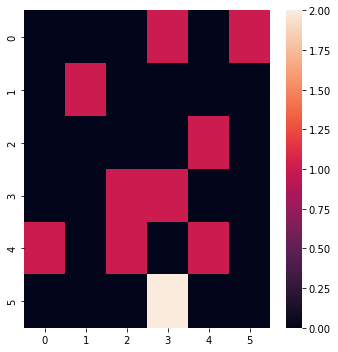

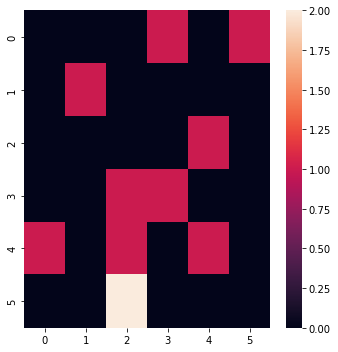

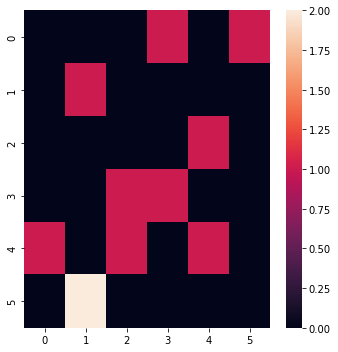

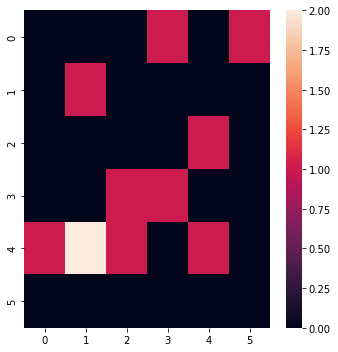

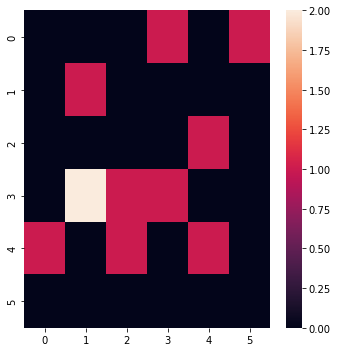

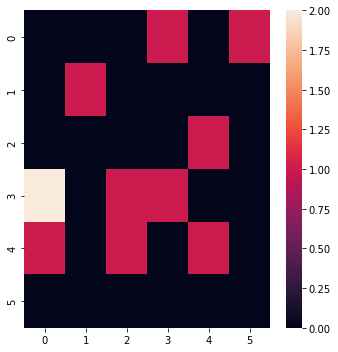

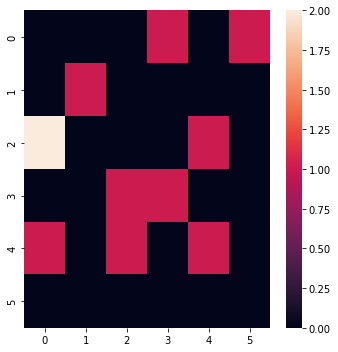

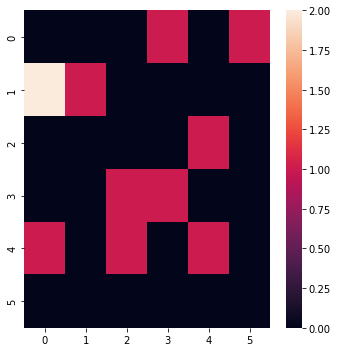

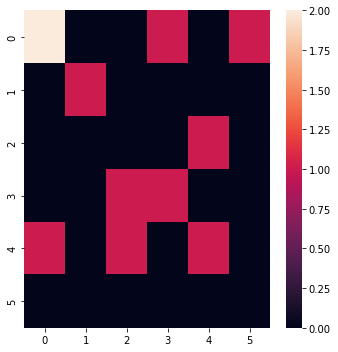

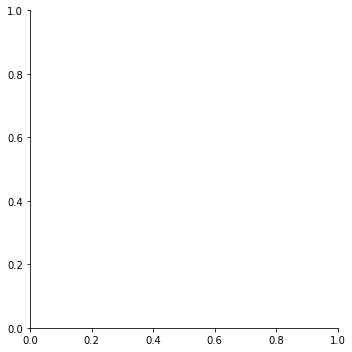

In [ ]:
print('Algoritmo de costo uniforme:')
solution, expanded = UCS(problema)
print('Action sequence:', solution.actions_path())
print('Cost:', problema.g(solution))
print('\nSolucion paso a paso: ')
objecto_a_lista((solution.states_path()))

Algoritmo Voraz:
Action sequence: ['move-U', 'move-U', 'move-U', 'move-U', 'move-L', 'move-L', 'move-L', 'move-U', 'move-L', 'move-L']
Cost: 10

Solucion paso a paso: 


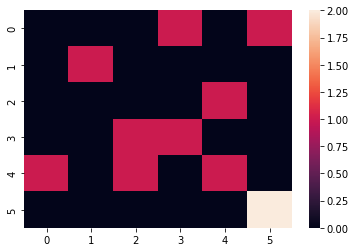

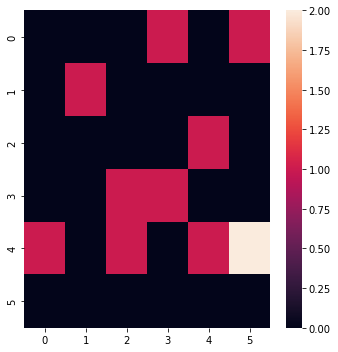

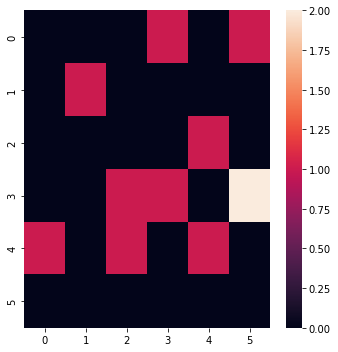

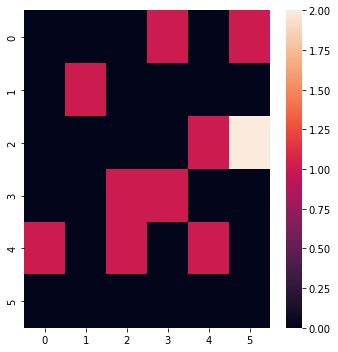

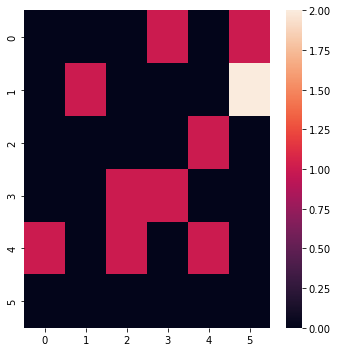

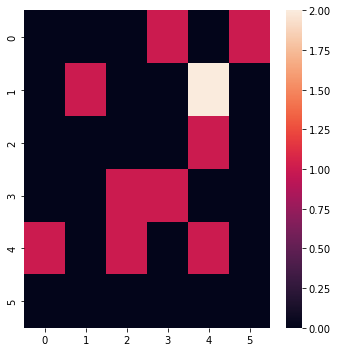

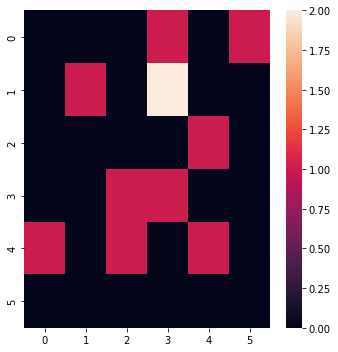

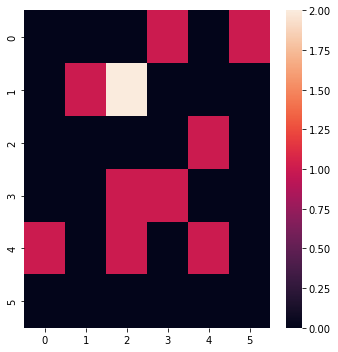

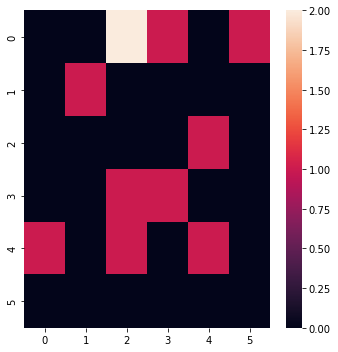

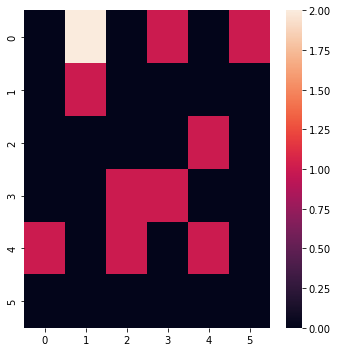

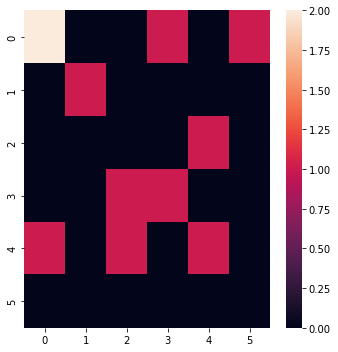

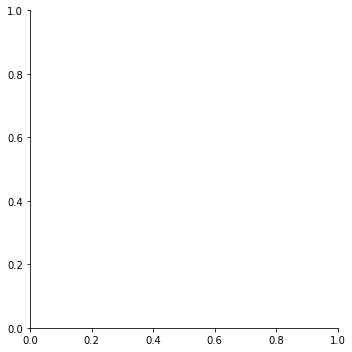

In [ ]:
print('Algoritmo Voraz:')
solution2, expanded2 = Voraz(problema)
print('Action sequence:', solution2.actions_path())
print('Cost:', problema.g(solution2))
print('\nSolucion paso a paso: ')
objecto_a_lista((solution2.states_path()))

Algoritmo de A*:
Action sequence: ['move-L', 'move-L', 'move-L', 'move-L', 'move-U', 'move-U', 'move-U', 'move-L', 'move-U', 'move-U']
Cost: 10

Solucion paso a paso: 


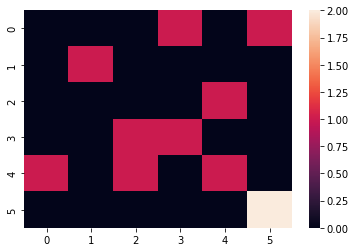

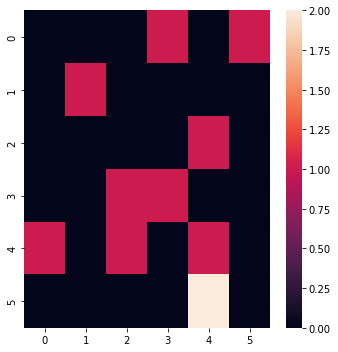

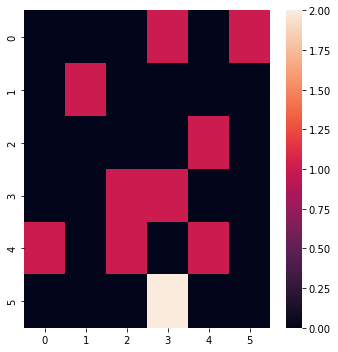

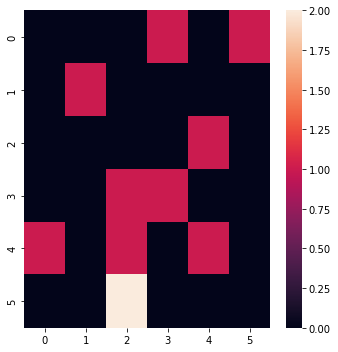

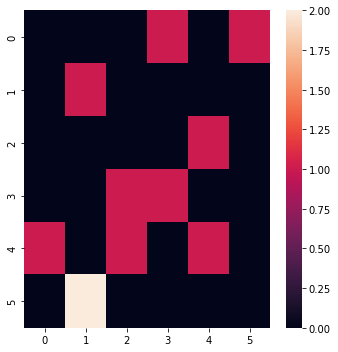

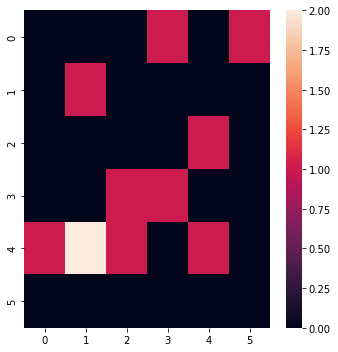

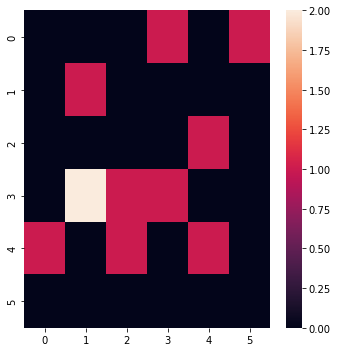

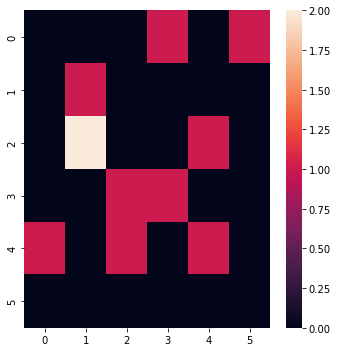

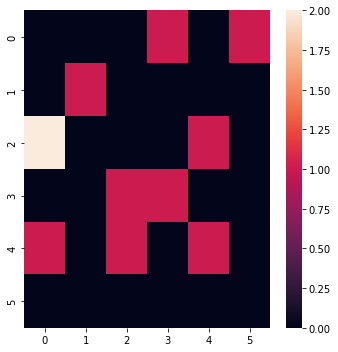

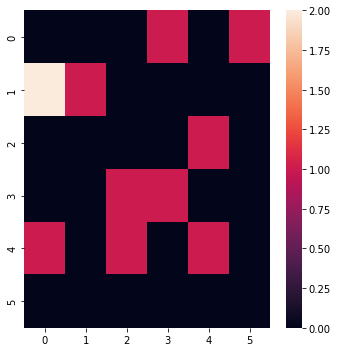

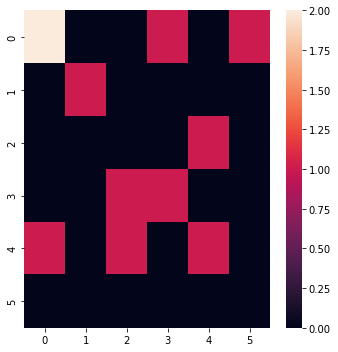

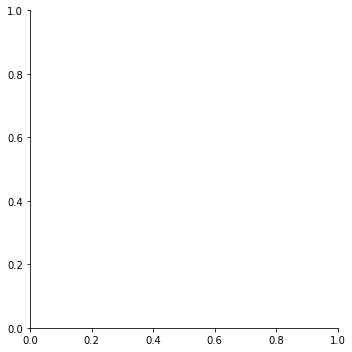

In [ ]:
print('Algoritmo de A*:')
solution3, expanded3 = AA(problema)
print('Action sequence:', solution3.actions_path())
print('Cost:', problema.g(solution3))
print('\nSolucion paso a paso: ')
objecto_a_lista((solution3.states_path()))

In [ ]:
print('Action sequence UCS:', solution.actions_path())
print('\nAction sequence Voraz:', solution2.actions_path())
print('\nAction sequence A*:', solution3.actions_path())

Action sequence UCS: ['move-L', 'move-L', 'move-L', 'move-L', 'move-U', 'move-U', 'move-L', 'move-U', 'move-U', 'move-U']

Action sequence Voraz: ['move-U', 'move-U', 'move-U', 'move-U', 'move-L', 'move-L', 'move-L', 'move-U', 'move-L', 'move-L']

Action sequence A*: ['move-L', 'move-L', 'move-L', 'move-L', 'move-U', 'move-U', 'move-U', 'move-L', 'move-U', 'move-U']


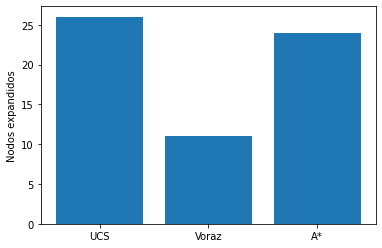

UCS:  26
Voraz:  11
A*:  24


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Definimos una lista con paises como string
Metodos = ['UCS', 'Voraz','A*']
#Definimos una lista con ventas como entero
Nodos = [expanded,expanded2,expanded3]

fig, ax = plt.subplots()
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Nodos expandidos')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.bar(Metodos,Nodos)
#Finalmente mostramos la grafica con el metodo show()
plt.show()

print('UCS: ',expanded)
print('Voraz: ',expanded2)
print('A*: ',expanded3)